In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import torch
import logging

import tensorcraft as tc


log = logging.getLogger("tensorcraft")
log.setLevel("INFO")

15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Processor multi index: torch.Size([1, 1])
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Missing elements: [2, 0]
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: N blocks per axis: [1, 1]
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Padded tensor shape: torch.Size([22, 5])
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Permute tuple: (0, 2, 1, 3)
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Reshape tuple: [2, 11, 1, 5]
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Tile Slices: [slice(tensor(1), None, 2), slice(None, None, None)]
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Local tensor shape: torch.Size([1, 1, 11, 5])
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Target local tensor shape: [11, 5]
15-04-2025 04:49:09 : INFO : multi_axis : apply -- R3: Linear processor index: 1, Residue: 2, Block size: 11, axis: 0, N procs: 2, N full blocks: 1
15-04-2025 04:49:09

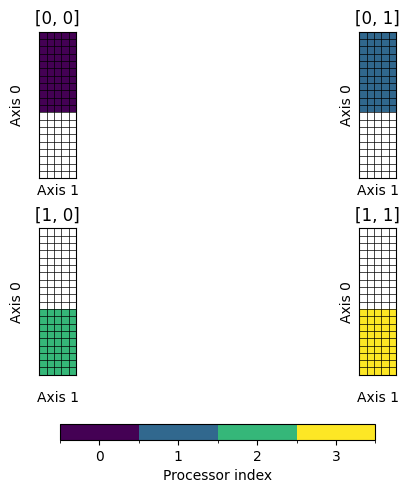

In [ ]:
rank = 3

x = torch.arange(100).reshape(20, 5)
global_shape = x.shape

mesh = torch.Size((2, 2))
dist = tc.dist.MultiAxisDist(mesh, ((0,),()), 11)

tensor_shape = x.shape
x_local = dist.apply(x, rank)
print(x_local)

fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, dist, cbar=True)

R3: Local tensor shape: torch.Size([9, 5])
R3: Predicted shape: torch.Size([9, 5])
15-04-2025 04:52:18 : INFO : <string> : apply_split -- New distribution: D_[2,2]⊥{0,1}(11,3)
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Processor multi index: torch.Size([1, 1])
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Missing elements 1
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Padding tuple: [0, 0, 1, 0]
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Padded local tensor shape: torch.Size([9, 6])
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Reshape list: [9, 2, 3]
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Permute list: [0, 1, 2]
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Tile Slices: [slice(None, None, None), slice(tensor(1), None, 2)]
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3: Reshaped tensor shape: torch.Size([9, 2, 3])
15-04-2025 04:52:18 : INFO : <string> : apply_split -- R3:

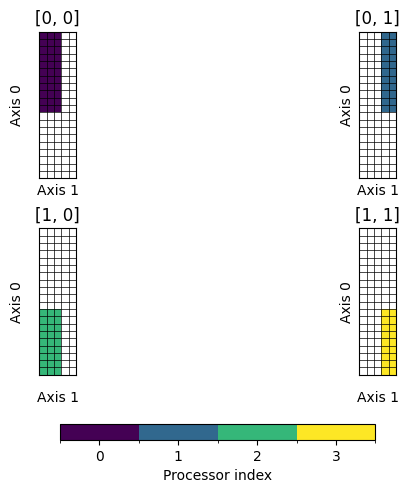

In [ ]:
new_dist, x_local_split = dist.apply_split(global_shape, x_local, rank, 1, 1, 3, minor=False)

print(x_local_split)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist, cbar=True)